<a href="https://colab.research.google.com/github/MonikSense/SensrGOSnO2/blob/main/rGOSnO2_RFR%20training%20loss%20and%20accuracy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

RMSE: 86.52 
MAE: 50.15 
R² Score: 0.79
Adjusted R²: 0.74
MAPE: 1331.79%
SMAPE: 93.48%
Explained Variance Score: 0.80


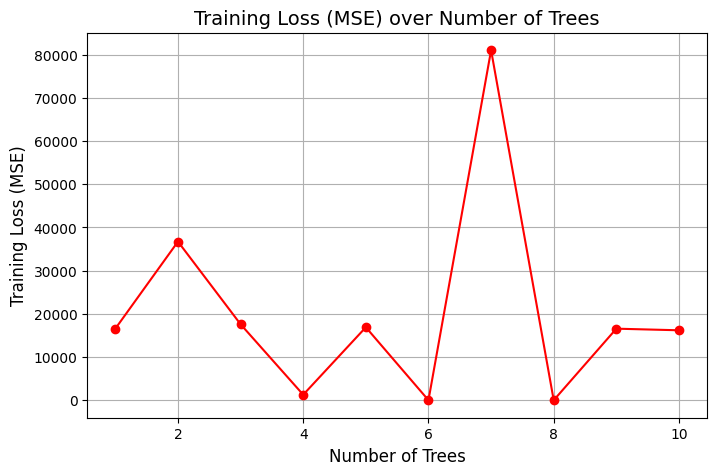

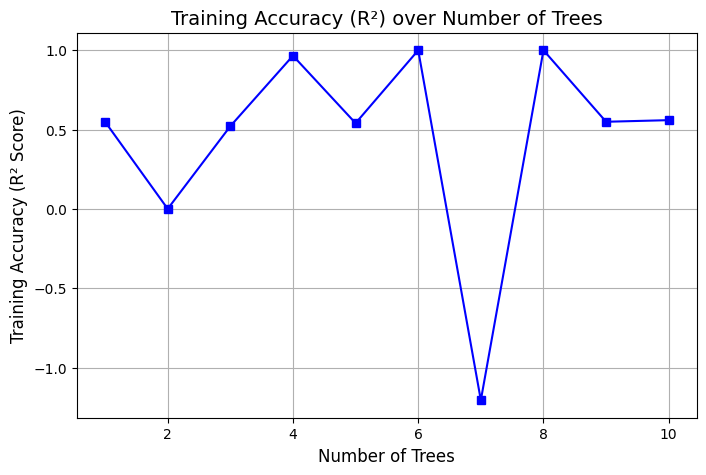

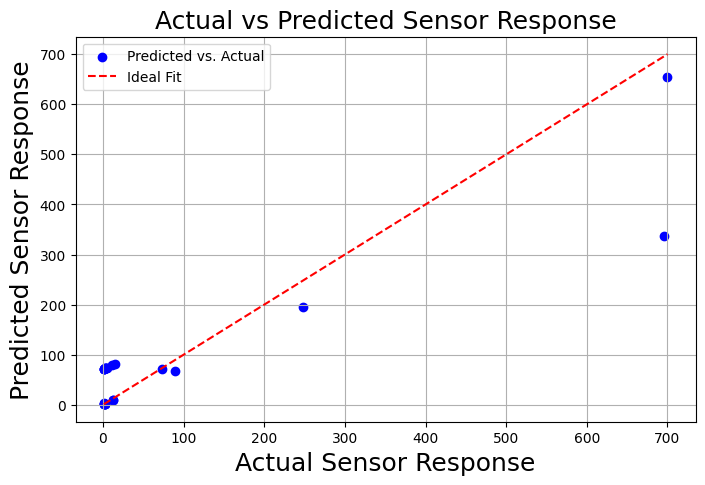

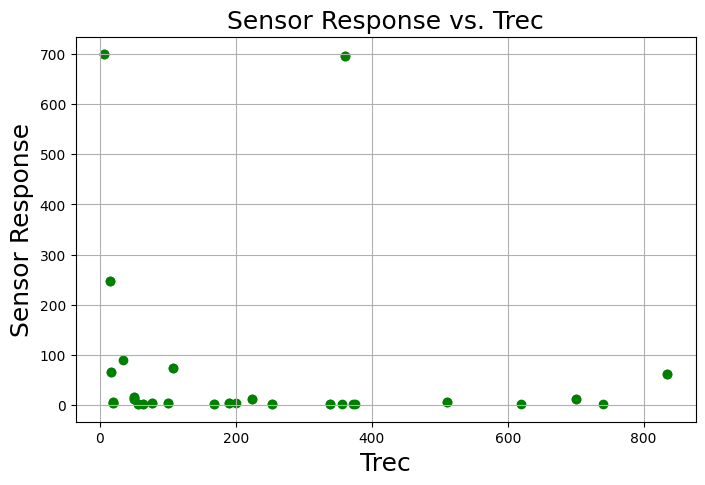

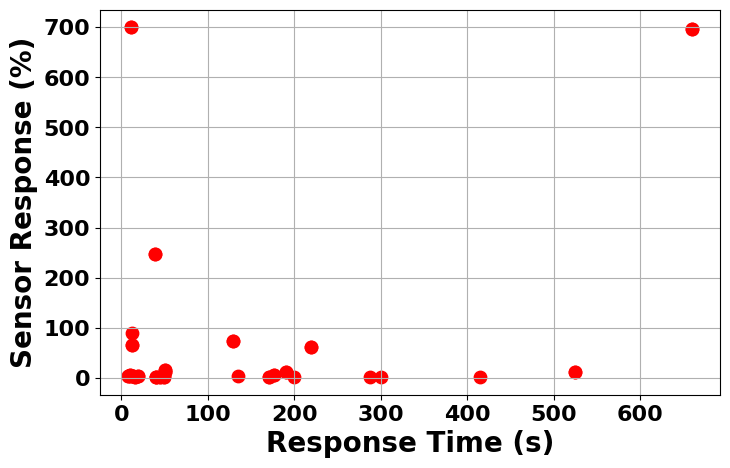

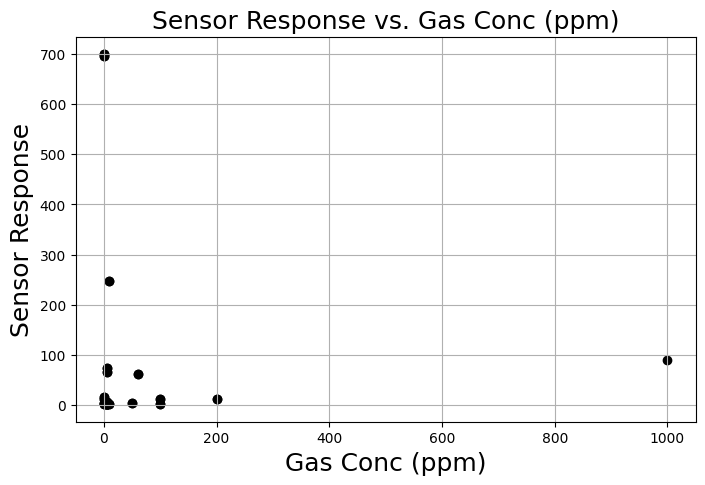

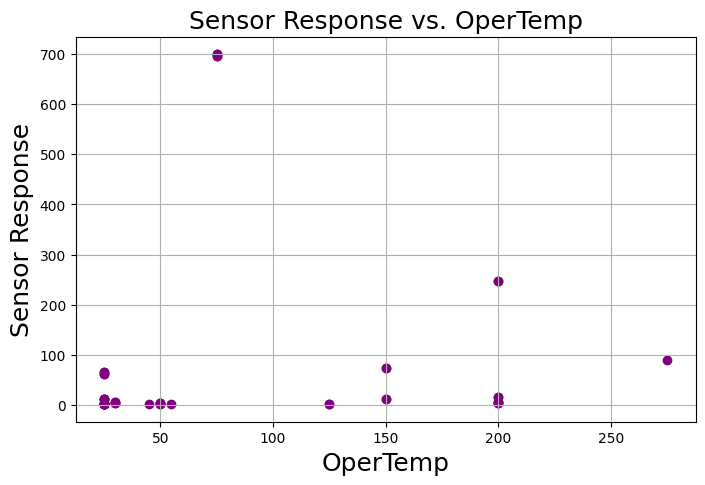

In [5]:

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score

# Function to calculate Adjusted R²
def adjusted_r2(r2, n, k):
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))

# Function to calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Function to calculate SMAPE
def symmetric_mean_absolute_percentage_error(y_true, y_pred):
    return 100 * np.mean(2 * np.abs(y_true - y_pred) / (np.abs(y_true) + np.abs(y_pred)))

# Load the CSV file
file_path = "https://raw.githubusercontent.com/MonikSense/MonikSense/refs/heads/main/rgosno4%20final.CSV"  # Replace with your CSV file path
data = pd.read_csv(file_path)
data
# Inspect the first few rows of the data
data
# Assume the CSV has multiple features and one target column
# Replace 'Feature1', 'Feature2', ..., 'Target' with actual column names
#Oper. Temp. ,Gas Conc (ppm),Sensor Response,Tres,Trec
X = data[['Trec','Gas Conc (ppm)','Sensor Response','OperTemp','Tres']].values  # Features No.,FREQUENCY[Hz],CP[F]
y = data['Sensor Response'].values  # Target
# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=50)

# Step 4: Train the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=10, random_state=50)  # You can adjust hyperparameters
rf_model.fit(X_train, y_train)

# Step 5: Make Predictions
y_pred = rf_model.predict(X_test)

# Step 6: Evaluate the Model
# Calculate metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
adj_r2 = adjusted_r2(r2, len(y_test), X_test.shape[1])
mape = mean_absolute_percentage_error(y_test, y_pred)
smape = symmetric_mean_absolute_percentage_error(y_test, y_pred)
explained_variance = explained_variance_score(y_test, y_pred)

# Print results
print(f"RMSE: {rmse:.2f} ")
print(f"MAE: {mae:.2f} ")
print(f"R² Score: {r2:.2f}")
print(f"Adjusted R²: {adj_r2:.2f}")
print(f"MAPE: {mape:.2f}%")
print(f"SMAPE: {smape:.2f}%")
print(f"Explained Variance Score: {explained_variance:.2f}")


# Extract the number of trees in the Random Forest model
n_estimators = len(rf_model.estimators_)

# Compute training loss (MSE) and training accuracy (R² score) for each tree
train_mse = []
train_r2 = []

for i, tree in enumerate(rf_model.estimators_):
    y_train_pred = tree.predict(X_train)
    mse = mean_squared_error(y_train, y_train_pred)
    r2 = r2_score(y_train, y_train_pred)
    train_mse.append(mse)
    train_r2.append(r2)

# Plot Training Loss (MSE)
plt.figure(figsize=(8, 5))
plt.plot(range(1, n_estimators + 1), train_mse, marker='o', linestyle='-', color='red')
plt.xlabel("Number of Trees", fontsize=12)
plt.ylabel("Training Loss (MSE)", fontsize=12)
plt.title("Training Loss (MSE) over Number of Trees", fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid()
plt.show()

# Plot Training Accuracy (R² Score)
plt.figure(figsize=(8, 5))
plt.plot(range(1, n_estimators + 1), train_r2, marker='s', linestyle='-', color='blue')
plt.xlabel("Number of Trees", fontsize=12)
plt.ylabel("Training Accuracy (R² Score)", fontsize=12)
plt.title("Training Accuracy (R²) over Number of Trees", fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid()
plt.show()


# Plot Actual vs Predicted Sensor Response
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, color='blue', label="Predicted vs. Actual")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='dashed', label="Ideal Fit")
plt.xlabel("Actual Sensor Response", fontsize=18)
plt.ylabel("Predicted Sensor Response", fontsize=18)
plt.title("Actual vs Predicted Sensor Response", fontsize=18)
plt.legend()
plt.grid()
plt.show()

# Plot Sensor Response vs. Trec
plt.figure(figsize=(8, 5))
plt.scatter(data['Trec'], data['Sensor Response'], color='green')
plt.xlabel("Trec", fontsize=18)
plt.ylabel("Sensor Response", fontsize=18)
plt.title("Sensor Response vs. Trec", fontsize=18)
plt.grid()
plt.show()


# Plot Sensor Response vs. Tres
plt.figure(figsize=(8, 5))
plt.scatter(data['Tres'], data['Sensor Response'], color='red', s=80)
plt.xlabel("Response Time (s)", fontsize=20, fontweight='bold')
plt.xticks(fontsize=16, fontweight='bold')
plt.ylabel("Sensor Response (%)", fontsize=20, fontweight='bold')
plt.yticks(fontsize=16, fontweight='bold')
# plt.title("Sensor Response vs. Tres", fontsize=18)
plt.grid()
plt.show()


# Plot Sensor Response vs. Trec
plt.figure(figsize=(8, 5))
plt.scatter(data['Gas Conc (ppm)'], data['Sensor Response'], color='black')
plt.xlabel("Gas Conc (ppm)", fontsize=18)
plt.ylabel("Sensor Response", fontsize=18)
plt.title("Sensor Response vs. Gas Conc (ppm)", fontsize=18)
plt.grid()
plt.show()


# Plot Sensor Response vs. Trec
plt.figure(figsize=(8, 5))
plt.scatter(data['OperTemp'], data['Sensor Response'], color='purple')
plt.xlabel("OperTemp", fontsize=18)
plt.ylabel("Sensor Response", fontsize=18)
plt.title("Sensor Response vs. OperTemp", fontsize=18)
plt.grid()
plt.show()
